In [62]:
import pandas as pd
import numpy as np

# Load Data

In [63]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [64]:
df = pd.read_csv("movies.csv")
print(df.columns)
df.head()

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Analysis

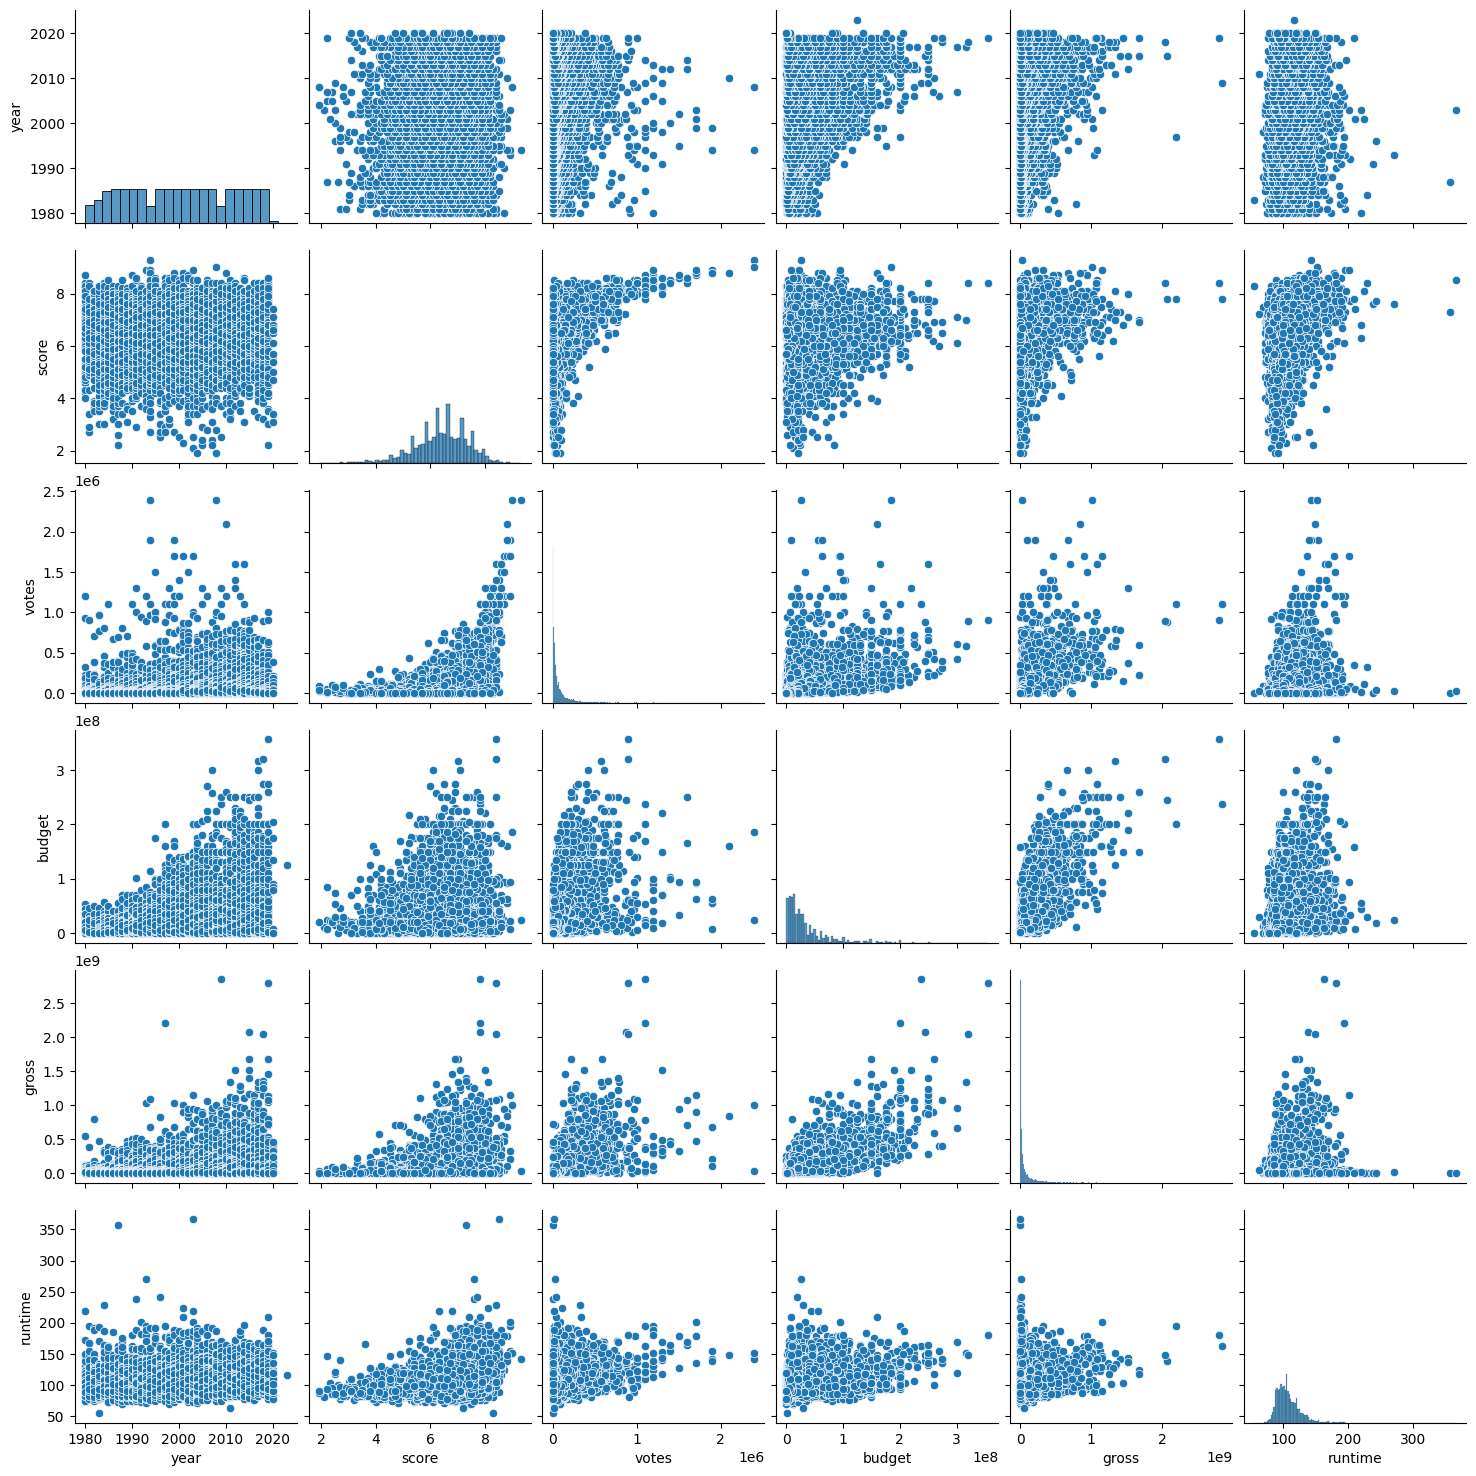

In [65]:
# plot pairplots
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

## Rating

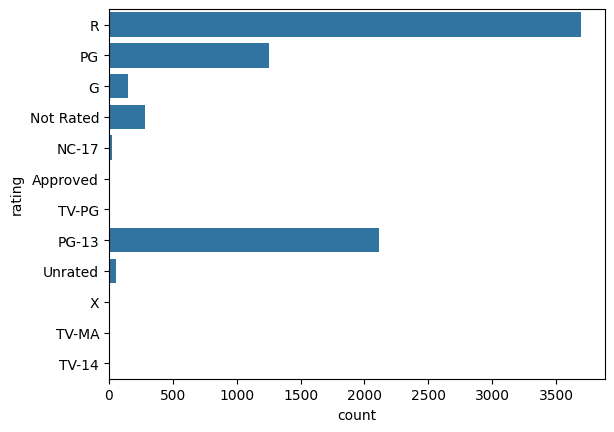

In [66]:
# rating = age rating
# show rating
sns.countplot(df["rating"])
plt.show()

## Genre

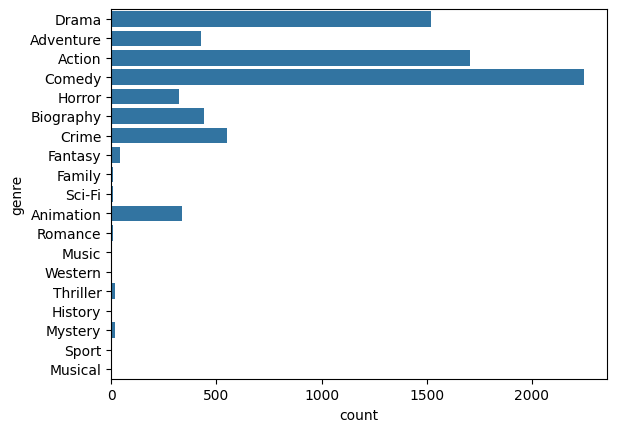

In [67]:
sns.countplot(df["genre"])
plt.show()

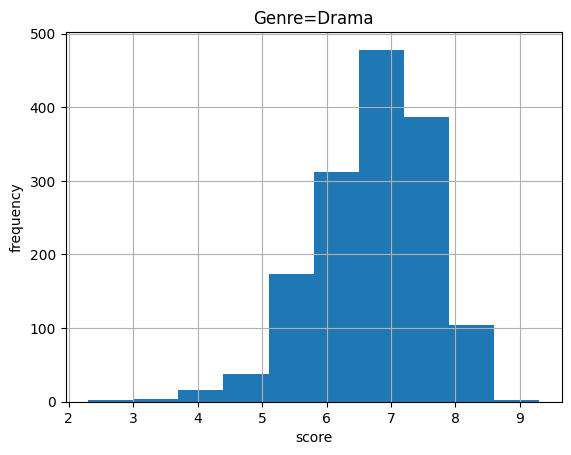

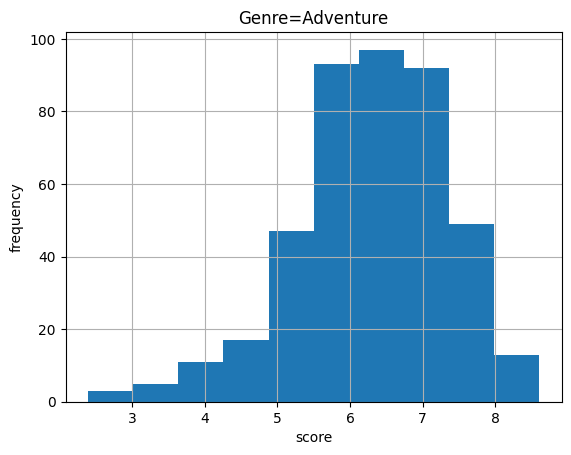

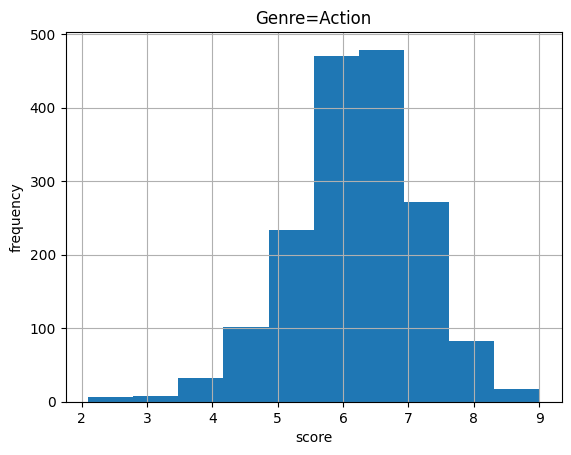

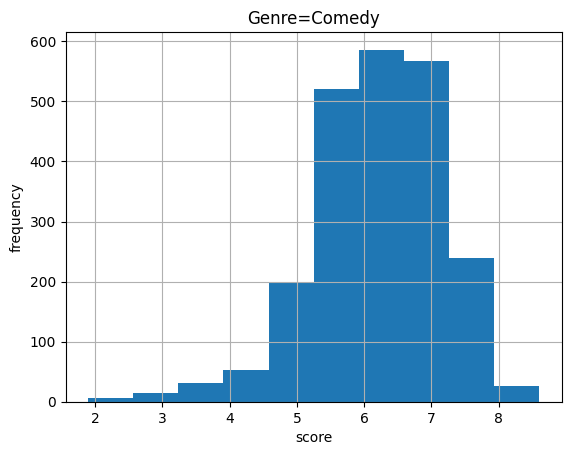

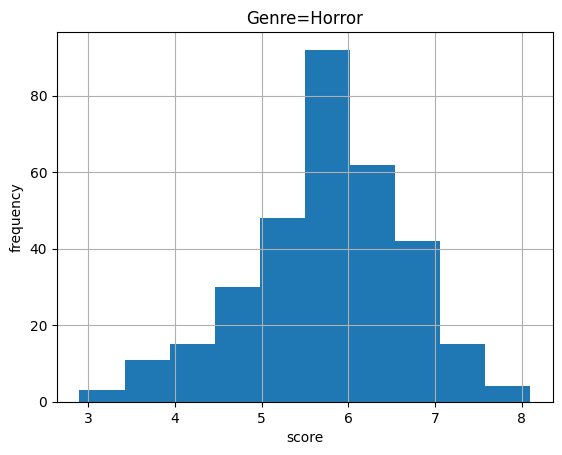

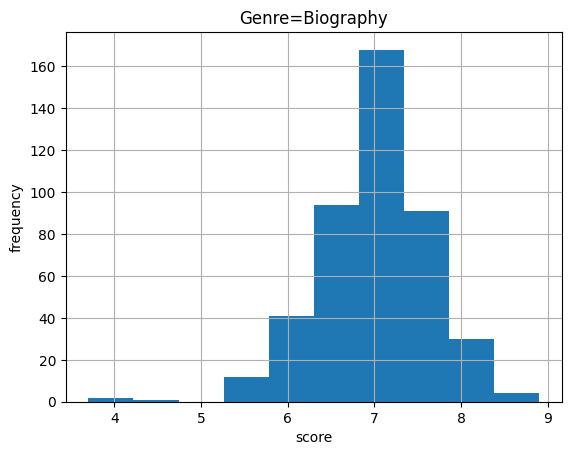

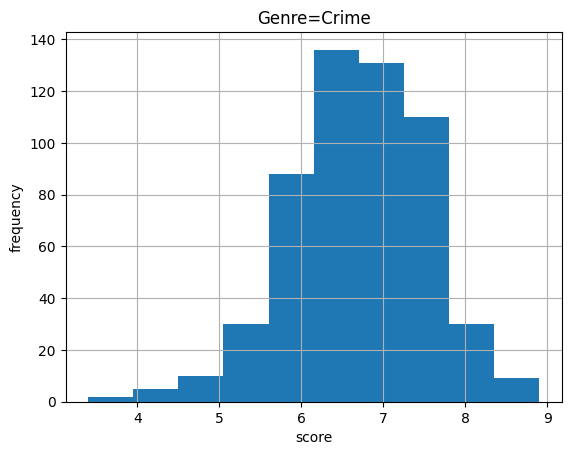

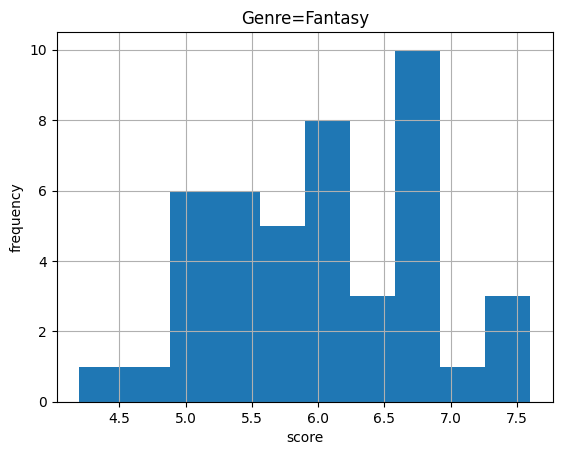

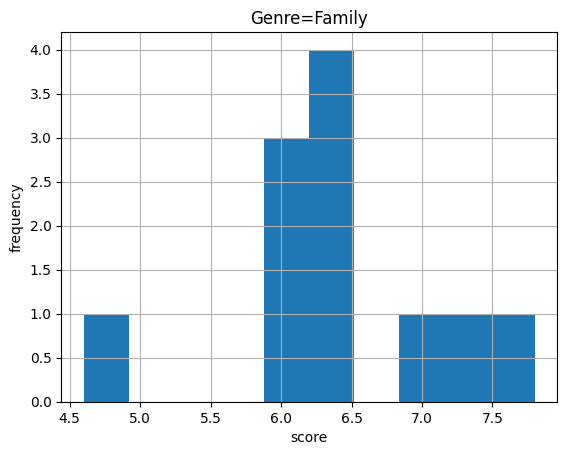

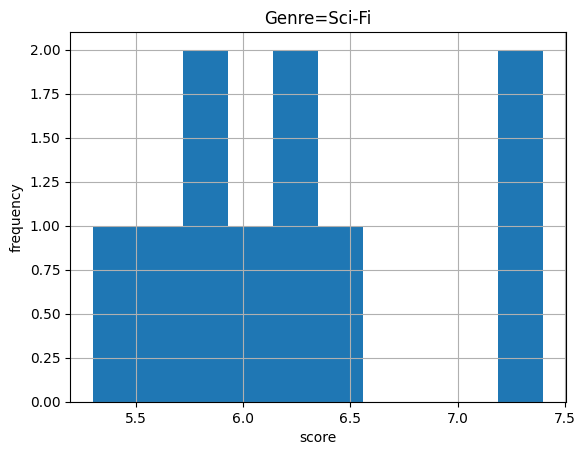

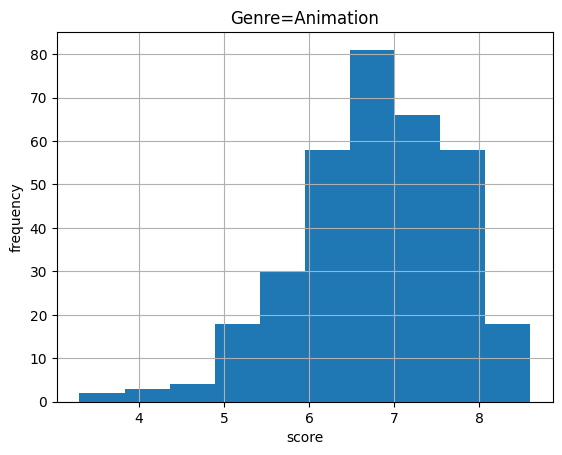

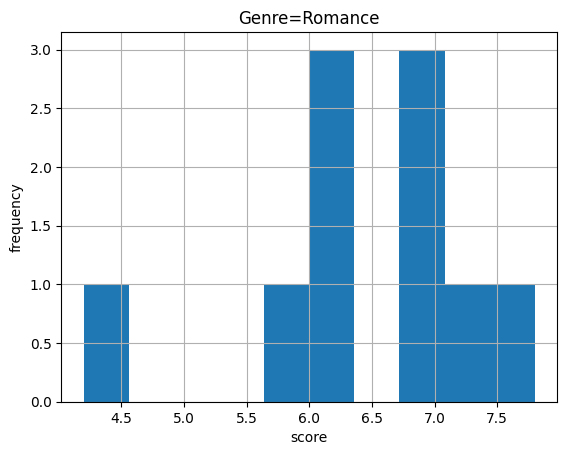

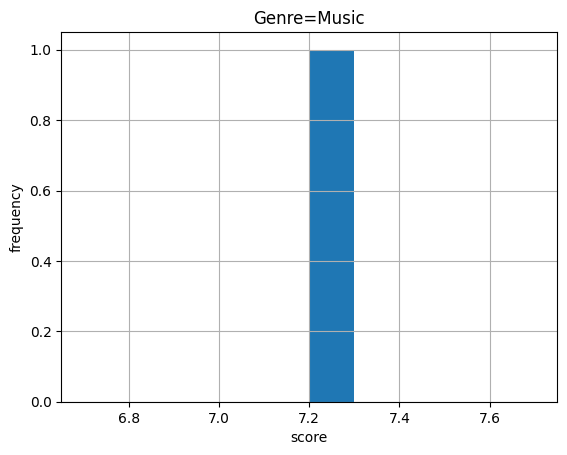

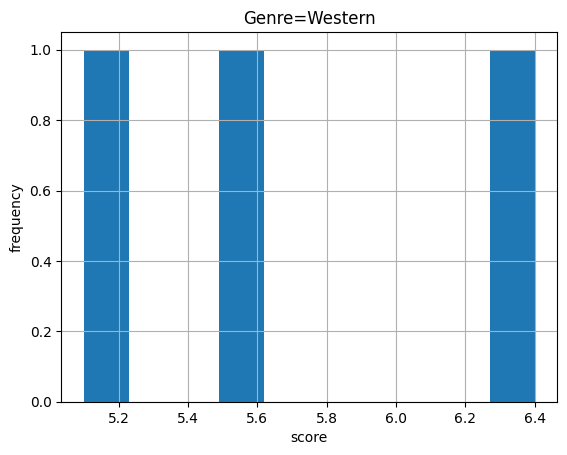

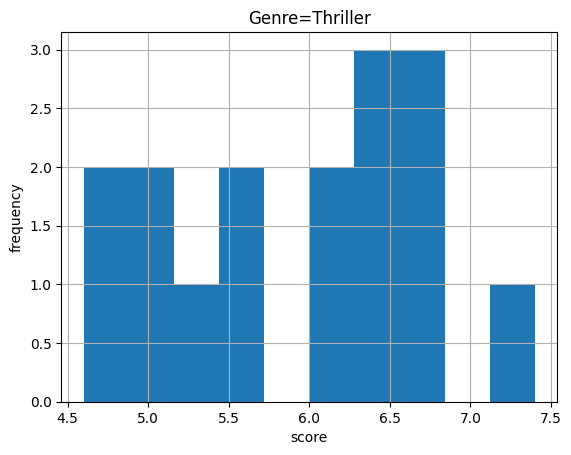

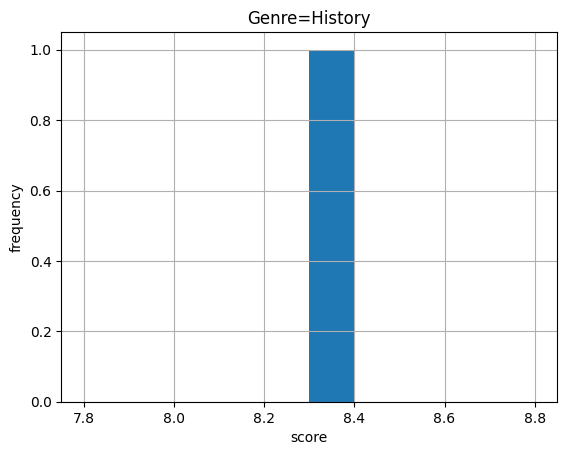

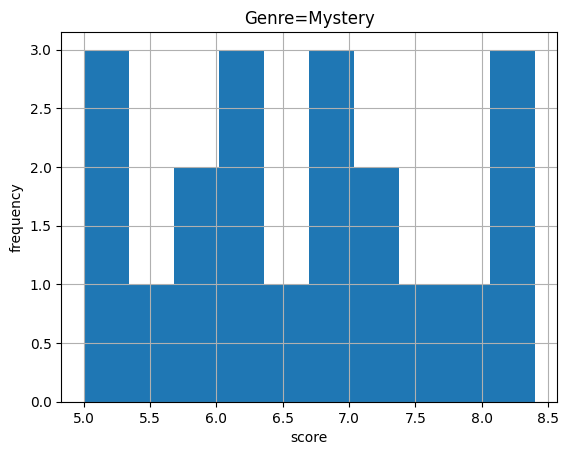

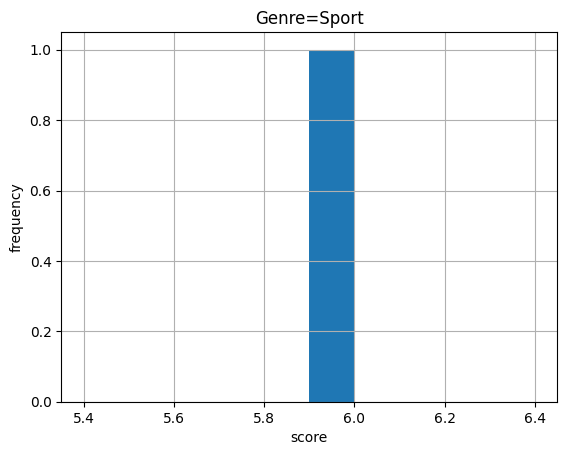

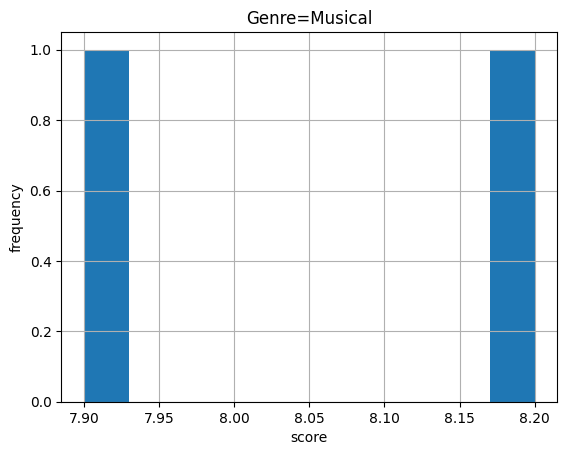

In [68]:
for category in df["genre"].unique():
    df[df["genre"] == category]["score"].hist()
    plt.title(f"Genre={category}")
    plt.xlabel("score")
    plt.ylabel("frequency")
    plt.show()

In [69]:
# print number of items in each category sorted by count
df["genre"].value_counts()

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     428
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

In [70]:
print(df.country.unique().shape)
df.country.value_counts()

(60,)


country
United States                     5476
United Kingdom                     816
France                             279
Canada                             190
Germany                            117
Australia                           92
Japan                               81
India                               62
Italy                               61
Spain                               47
Hong Kong                           45
Ireland                             43
China                               40
South Korea                         35
Denmark                             32
Sweden                              25
New Zealand                         25
Mexico                              22
Norway                              12
West Germany                        12
Netherlands                         12
Iran                                10
Switzerland                         10
Russia                               8
Belgium                              8
Argentina        

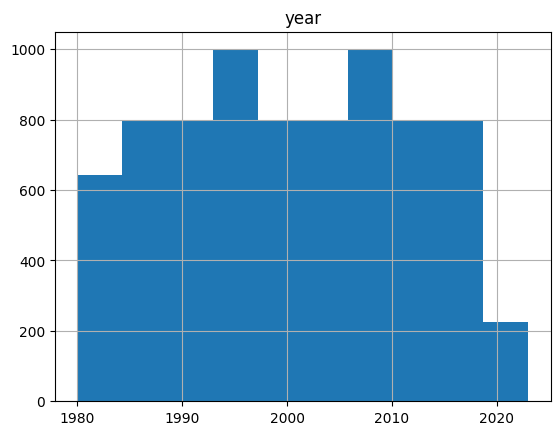

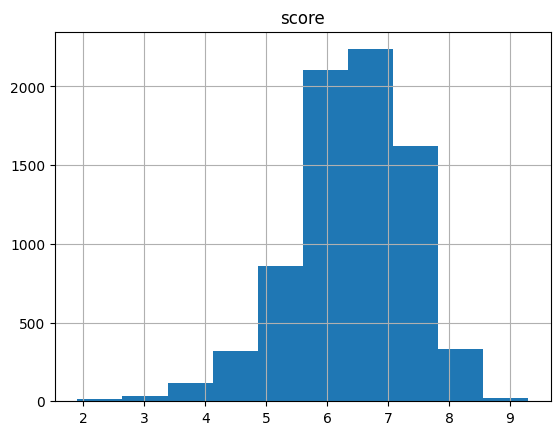

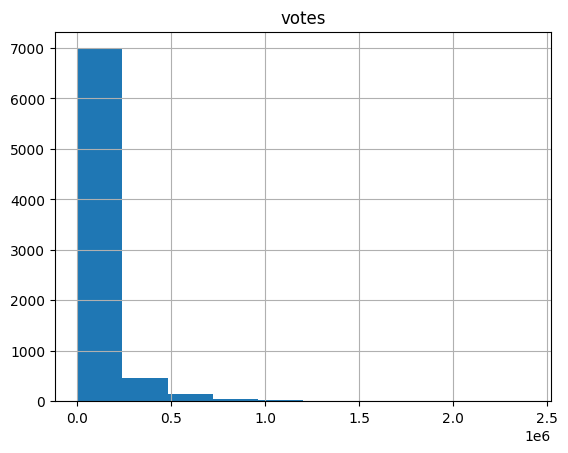

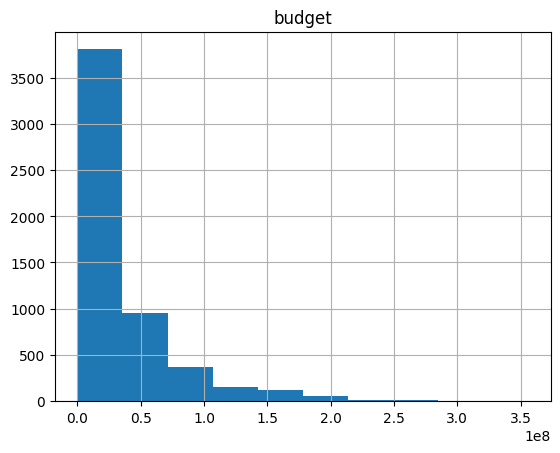

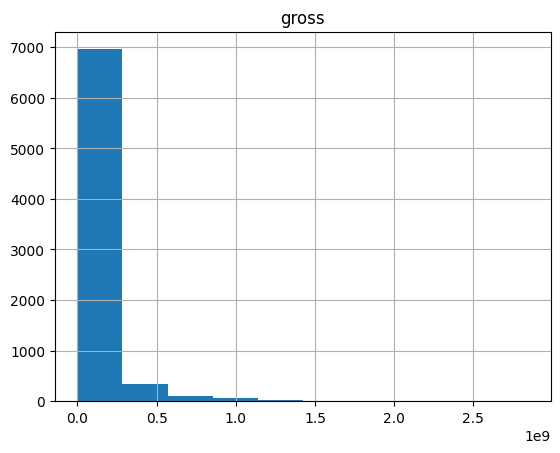

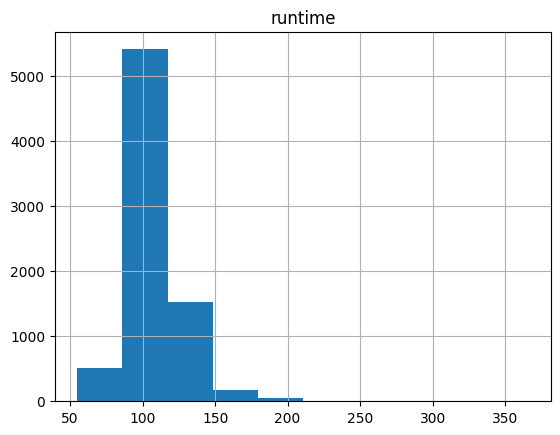

In [71]:
# plot histogram for each continuous variable
for col in df.columns:
    if df[col].dtype != "object":
        df[col].hist()
        plt.title(col)
        plt.show()

## Year

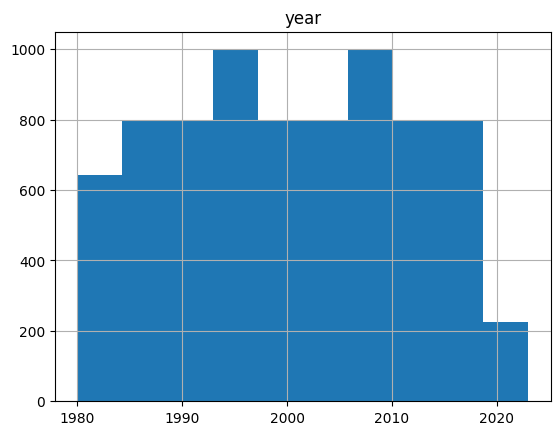

In [72]:
df["year"].hist()
plt.title("year")
plt.show()

## Released

In [73]:
# convert column "released" to string
df["released"] = df["released"].astype(str)

In [74]:
# how often is "year" in "released" column? str(df["year"]) in df["released"]
df["same_year"] = df.apply(lambda row: str(row["year"]) in row["released"], axis=1)
df["same_year"].value_counts()

same_year
True     6343
False    1326
Name: count, dtype: int64

In [75]:
df[df["same_year"] == False].head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,same_year
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,False
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0,False
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000.0,3484523.0,Partisan Productions,219.0,False
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000.0,534816.0,Cattle Annie Productions,97.0,False
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700.0,John Hough,Brian Clemens,Bette Davis,United States,NaN,5000000.0,Walt Disney Productions,84.0,False


## Director

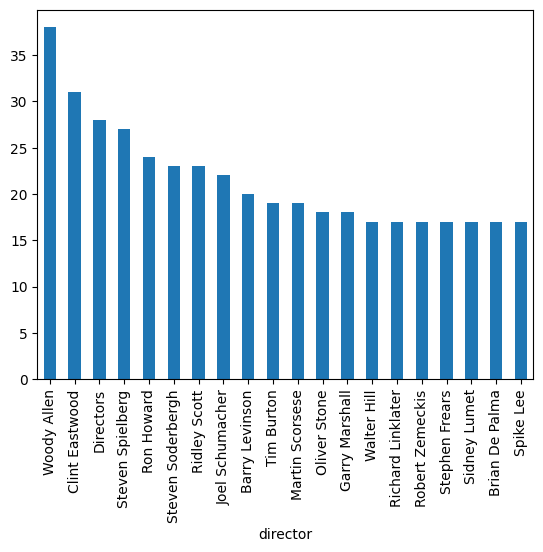

In [76]:
# do plot count of top 100 directors
df["director"].value_counts().head(20).plot(kind="bar")
plt.show()

In [77]:
df["director"].describe()

count            7669
unique           2949
top       Woody Allen
freq               38
Name: director, dtype: object

## Writer

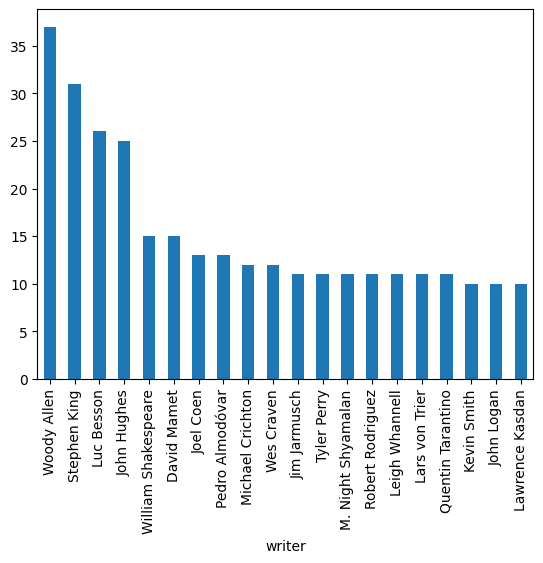

In [78]:
df["writer"].value_counts().head(20).plot(kind="bar")
plt.show()

In [79]:
df["writer"].describe()

count            7666
unique           4535
top       Woody Allen
freq               37
Name: writer, dtype: object

## Star

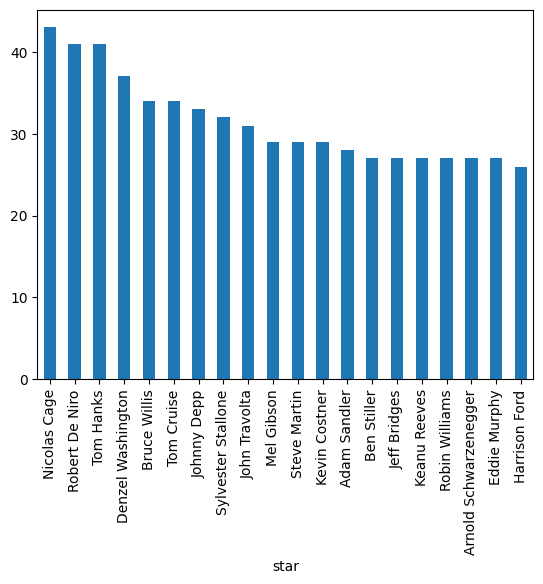

In [80]:
df["star"].value_counts().head(20).plot(kind="bar")
plt.show()

In [81]:
df["star"].describe()

count             7668
unique            2815
top       Nicolas Cage
freq                43
Name: star, dtype: object

## Country

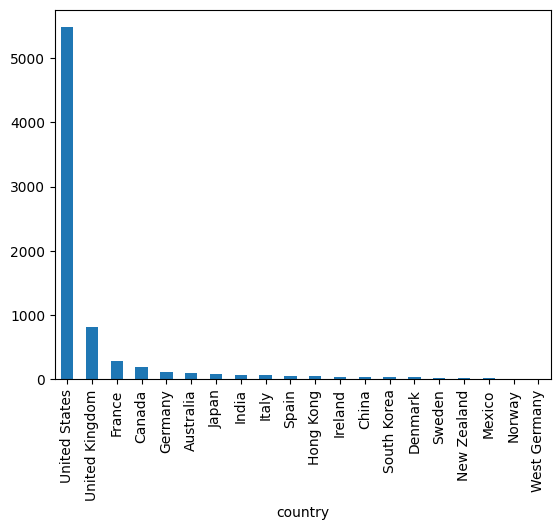

In [82]:
df["country"].value_counts().head(20).plot(kind="bar")
plt.show()

In [83]:
df["country"].describe()

count              7666
unique               59
top       United States
freq               5476
Name: country, dtype: object

## Budget

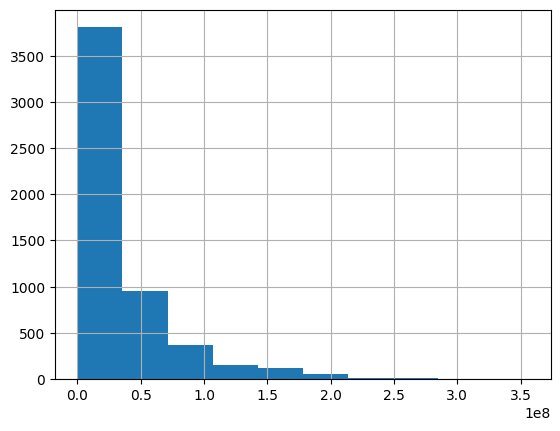

In [84]:
df["budget"].hist()
plt.show()

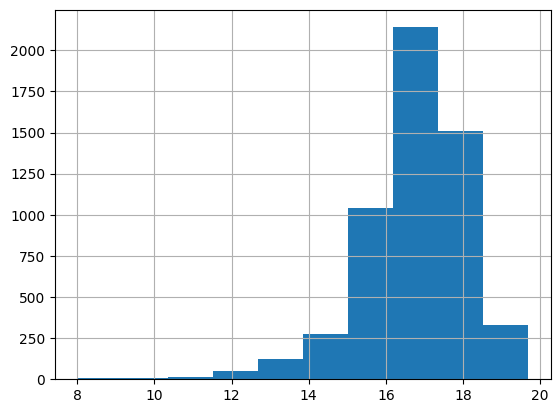

In [85]:
np.log(df["budget"]).hist()
plt.show()

## Company

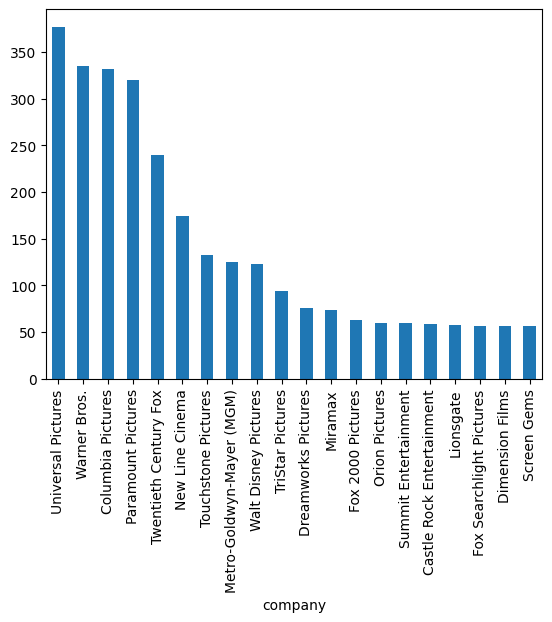

In [86]:
df["company"].value_counts().head(20).plot(kind="bar")
plt.show()

In [87]:
df["company"].describe()

count                   7652
unique                  2385
top       Universal Pictures
freq                     377
Name: company, dtype: object

## Runtime

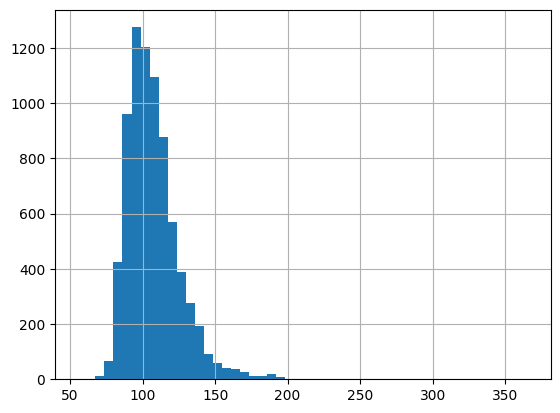

In [88]:
df["runtime"].hist(bins=50)
plt.show()

In [89]:
df.runtime.describe()

count    7665.000000
mean      107.262753
std        18.580303
min        55.000000
25%        95.000000
50%       104.000000
75%       116.000000
max       366.000000
Name: runtime, dtype: float64

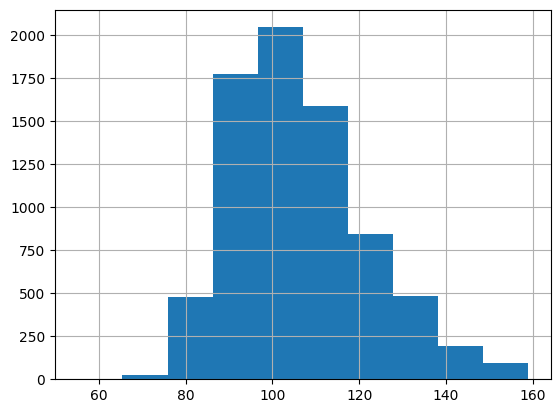

In [90]:
df[df["runtime"] < 160]["runtime"].hist()
plt.show()

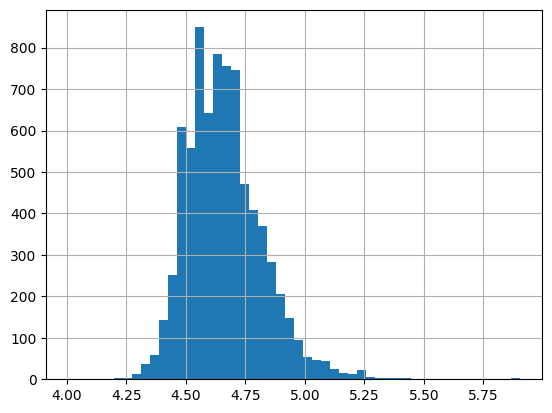

In [91]:
np.log(df["runtime"]).hist(bins=50)
plt.show()

## Score

<Axes: >

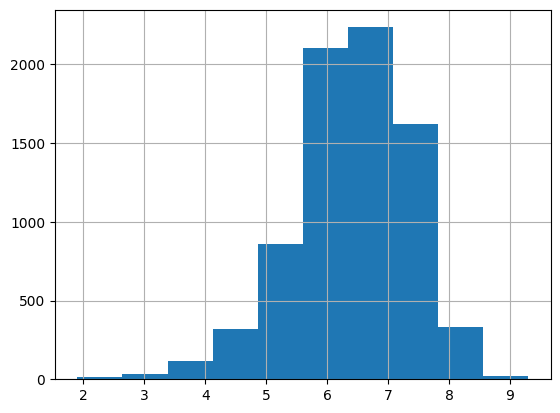

In [92]:
df.score.hist()

# Feature Selection

In [93]:
columns_to_dummies = []
columns_ignore = ["name", "released", "score", "votes", "gross", "same_year"]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,same_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,True
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,True
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,True
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,True
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,True


## Name

In [94]:
df["name_len"] = df["name"].apply(len)

In [95]:
import re

# Mapping of number words to their numeric counterparts
number_words = {
    'one': '1',
    'two': '2',
    'three': '3',
    'four': '4',
    'five': '5',
    'six': '6',
    'seven': '7',
    'eight': '8',
    'nine': '9',
    'ten': '10'
    # Add more as needed
}


def has_number(movie):
    # Check for numeric numbers
    if re.search(r'\d', movie):
        return True

    # Check for Roman numerals
    elif re.search(r'\b[i,v,x,l,c,d,m]+\b', movie, re.I):
        return True

    # Check for number words
    else:
        for word in movie.split():
            if word.lower() in number_words:
                return True

    return False

df["has_number"] = df["name"].apply(has_number)

In [96]:
df.iloc[[8]]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,same_year,name_len,has_number
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,False,11,True


## Rating

In [97]:
columns_to_dummies.append("rating")

## Genre

In [98]:
columns_to_dummies.append("genre")

## Year

In [99]:
year_min = df["year"].min()
df["year_relative"] = df["year"] - year_min

## Released

## Director

In [100]:
# director

# keep only top 20 directors, all else will be unknown
top_directors = df["director"].value_counts().index[:20]
df.loc[~df["director"].isin(top_directors), "director"] = "Unknown"

In [101]:
columns_to_dummies.append("director")

## Writer

In [102]:
# writer

# keep only top 20 writers, all else will be unknown
top_writers = df["writer"].value_counts().index[:20]
df.loc[~df["writer"].isin(top_writers), "writer"] = "Unknown"

In [103]:
columns_to_dummies.append("writer")

## Star

In [104]:
# star

# keep only top 20 writers, all else will be unknown
top_stars = df["star"].value_counts().index[:20]
df.loc[~df["star"].isin(top_stars), "star"] = "Unknown"

In [105]:
columns_to_dummies.append("star")

## Country

In [106]:
columns_to_dummies.append("country")

## Budget

In [107]:
# replace budget nan with median
df["budget"].fillna(df["budget"].median(), inplace=True)

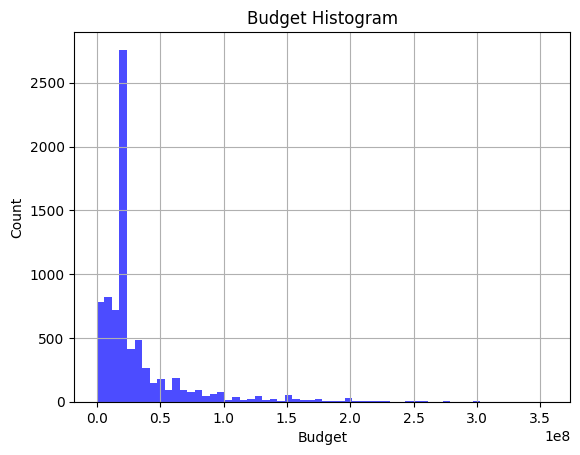

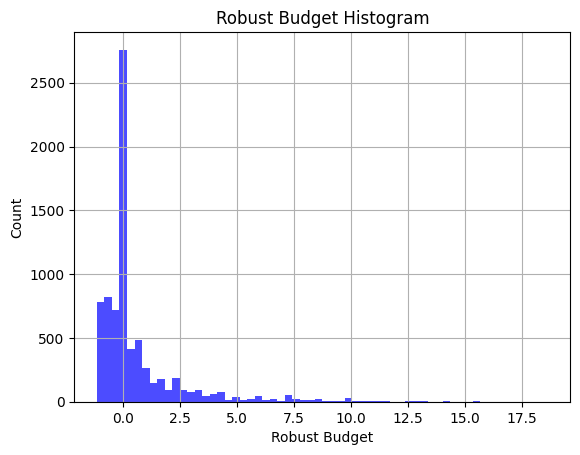

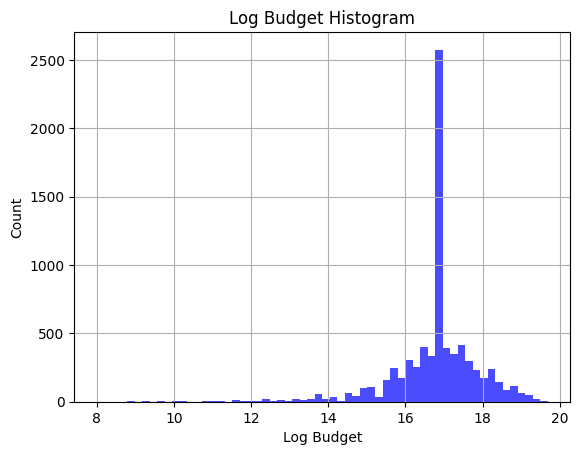

In [108]:
# budget
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Fit and transform data
df["robust_budget"] = scaler.fit_transform(df[["budget"]])
df["log_budget"] = np.log(df["budget"])


def plot_histogram(data_feature, title, x_label, y_label):
    plt.hist(data_feature, bins=60, color="blue", alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()


plot_histogram(df["budget"], "Budget Histogram", "Budget", "Count")
plot_histogram(df["robust_budget"], "Robust Budget Histogram", "Robust Budget", "Count")
plot_histogram(df["log_budget"], "Log Budget Histogram", "Log Budget", "Count")

## Company

In [109]:
# company

# keeping top 30 companies
top_companies = df["company"].value_counts().index[:30]
df.loc[~df["company"].isin(top_companies), "company"] = "Unknown"

In [110]:
columns_to_dummies.append("company")

## Runtime

In [111]:
# runtime nan with median
df["runtime"].fillna(df["runtime"].median(), inplace=True)

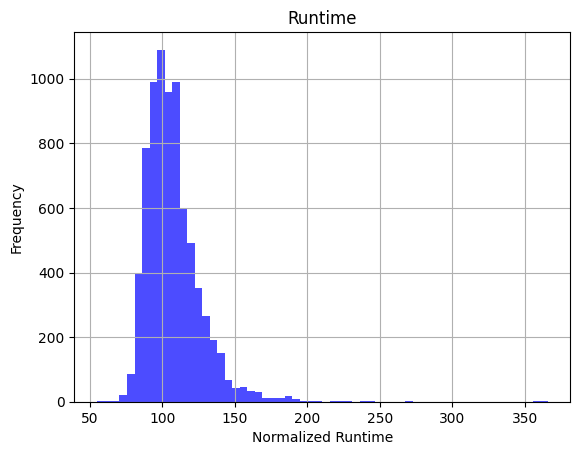

In [112]:
# runtime
df["log_runtime"] = np.log(df["runtime"] + 1)
plot_histogram(df["runtime"], "Runtime", "Normalized Runtime", "Frequency")

## Gross

Currently being ignored

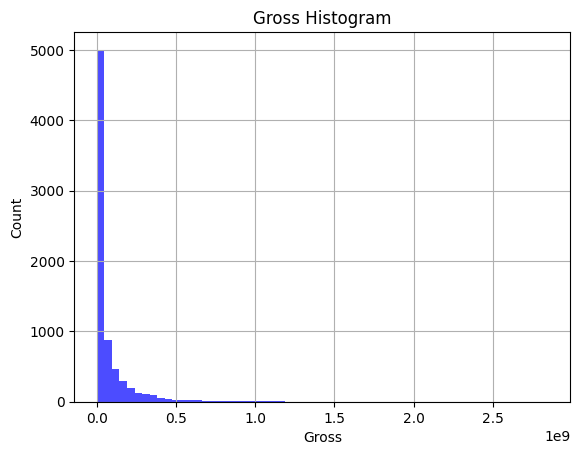

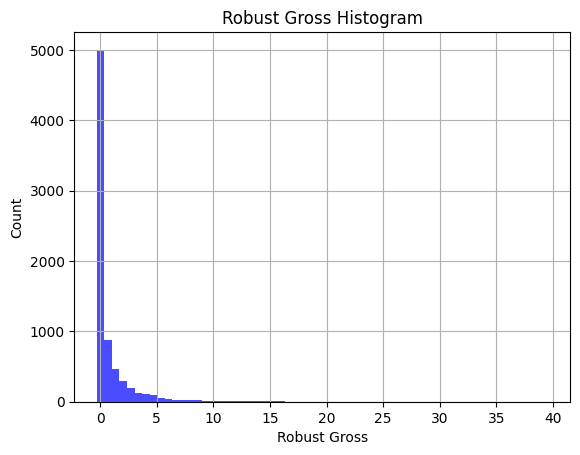

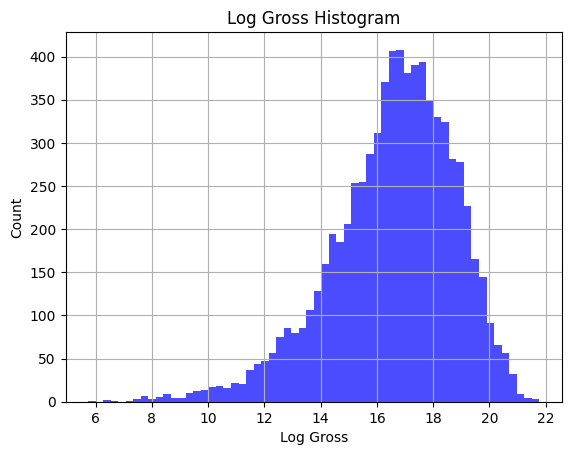

In [113]:
# gross

# Fit and transform data
df["robust_gross"] = scaler.fit_transform(df["gross"].values.reshape(-1, 1))
df["log_gross"] = np.log(df["gross"])

plot_histogram(df["gross"], "Gross Histogram", "Gross", "Count")
plot_histogram(df["robust_gross"], "Robust Gross Histogram", "Robust Gross", "Count")
plot_histogram(df["log_gross"], "Log Gross Histogram", "Log Gross", "Count")

## Create one-hot encoding

In [114]:
columns_to_dummies

['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']

In [115]:
set(df.columns) - set(columns_ignore + columns_to_dummies)

{'budget',
 'has_number',
 'log_budget',
 'log_gross',
 'log_runtime',
 'name_len',
 'robust_budget',
 'robust_gross',
 'runtime',
 'year',
 'year_relative'}

In [116]:
df = pd.get_dummies(df, columns=columns_to_dummies)

In [117]:
len(df.columns)

201

# Export Data

In [123]:
len(df.columns)

201

In [124]:
df.drop(columns=columns_ignore).head()

,year,budget,runtime,name_len,has_number,year_relative,robust_budget,log_budget,log_runtime,robust_gross,log_gross,rating_Approved,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,rating_Unrated,rating_X,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western,director_Barry Levinson,director_Brian De Palma,director_Clint Eastwood,director_Directors,director_Garry Marshall,director_Joel Schumacher,director_Martin Scorsese,director_Oliver Stone,director_Richard Linklater,director_Ridley Scott,director_Robert Zemeckis,director_Ron Howard,director_Sidney Lumet,director_Spike Lee,director_Stephen Frears,director_Steven Soderbergh,director_Steven Spielberg,director_Tim Burton,director_Unknown,director_Walter Hill,director_Woody Allen,writer_David Mamet,writer_Jim Jarmusch,writer_Joel Coen,writer_John Hughes,writer_John Logan,writer_Kevin Smith,writer_Lars von Trier,writer_Lawrence Kasdan,writer_Leigh Whannell,writer_Luc Besson,writer_M. Night Shyamalan,writer_Michael Crichton,writer_Pedro Almodóvar,writer_Quentin Tarantino,writer_Robert Rodriguez,writer_Stephen King,writer_Tyler Perry,writer_Unknown,writer_Wes Craven,writer_William Shakespeare,writer_Woody Allen,star_Adam Sandler,star_Arnold Schwarzenegger,star_Ben Stiller,star_Bruce Willis,star_Denzel Washington,star_Eddie Murphy,star_Harrison Ford,star_Jeff Bridges,star_John Travolta,star_Johnny Depp,star_Keanu Reeves,star_Kevin Costner,star_Mel Gibson,star_Nicolas Cage,star_Robert De Niro,star_Robin Williams,star_Steve Martin,star_Sylvester Stallone,star_Tom Cruise,star_Tom Hanks,star_Unknown,country_Argentina,country_Aruba,country_Australia,country_Austria,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Federal Republic of Yugoslavia,country_Finland,country_France,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Kenya,country_Lebanon,country_Libya,country_Malta,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Panama,country_Philippines,country_Poland,country_Portugal,country_Republic of Macedonia,country_Romania,country_Russia,country_Serbia,country_South Africa,country_South Korea,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,country_West Germany,country_Yugoslavia,company_Alcon Entertainment,company_BBC Films,company_Castle Rock Entertainment,company_Columbia Pictures,company_Dimension Films,company_DreamWorks Animation,company_Dreamworks Pictures,company_Focus Features,company_Fox 2000 Pictures,company_Fox Searchlight Pictures,company_Hollywood Pictures,company_Lionsgate,company_Metro-Goldwyn-Mayer (MGM),company_Miramax,company_Morgan Creek Entertainment,company_New Line Cinema,company_New Regency Productions,company_Orion Pictures,company_Paramount Pictures,company_Revolution Studios,company_Screen Gems,company_Summit Entertainment,company_The Weinstein Company,company_Touchstone Pictures,company_TriStar Pictures,company_Twentieth Century Fox,company_United Artists,company_Universal Pictures,company_Unknown,company_Walt Disney Pictures,company_Warner Bros.
0,1980,19000000.0,146.0,11,False,0,-0.083333,16.759950,4.990433,0.374808,17.665632,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [125]:
# drop score nan
df.dropna(inplace=True)

In [126]:
df.to_excel("preprocessed.xlsx", index=False)


In [127]:
columns_ignore

['name', 'released', 'score', 'votes', 'gross', 'same_year']